# **Name:** Tim Hollis  
# **Course:** DSC540 - Data Preparation  
# **Date:** December 12, 2023  
# **Assignment:** Week 1 & 2 Exercises 

<hr style="border: none; border-top: 5px dashed blue;">

## Data Sources & Assignment Setup

This assignment uses the following datasets, all placed in the same folder as this notebook for simplicity and reproducibility:

1. **World Population (1950–2021)**
   - File: `world-population.xlsm`
   - Source: Commonly used dataset from the textbook companion materials / public domain sources
   - Contains columns including `Year` and `Population` (total world population)
   - Used in Question 2 to create a line chart of global population growth with Matplotlib

2. **Global Sales Records**
   - File: `sales_record.csv`
   - Source: Provided with Chapter 2 of The Data Wrangling Workshop (2nd Edition)
   - Contains 14 columns: `Region`, `Country`, `Item Type`, `Sales Channel`, `Order Priority`, `Order Date`, `Order ID`, `Ship Date`, `Units Sold`, `Unit Price`, `Unit Cost`, `Total Revenue`, `Total Cost`, `Total Profit`
   - Used in Question 6 (Activity 2.02) to build and test a custom CSV parser from scratch using only base Python and `itertools.zip_longest`

All other activities (list handling, random number generation, permutations, text processing with Pride and Prejudice excerpt) are performed using in-memory data structures.

<hr style="border: none; border-top: 5px dashed blue;">

### **Importing Libraries and Loading Datasets**

In [1]:
# Import Required Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import subprocess
import sys
import string
import warnings
from collections import Counter
from datetime import datetime
from itertools import permutations, dropwhile, zip_longest

warnings.filterwarnings('ignore')  # Filter out any future warnings

# Load the datasets
world_pop_path = 'world-population.xlsm'
sales_record_path = 'sales_record.csv'

# Set plotting style for consistent visualizations
plt.style.use('ggplot')

print('✅ All libraries imported successfully')
print(f'📅 Current date: {datetime.now().strftime("%m-%d-%y")}')

✅ All libraries imported successfully
📅 Current date: 12-12-25


<hr style="border: none; border-top: 5px dashed blue;">
<hr style="border:none; height:5px; background-color:black;">

## **Week 1 & 2, Assignment Q: 1**

### **Task:**

Create a Jupyter notebook where you create a list, iterate over the list and sort your results, generate random numbers, add to the list, and then print your results.

### **Steps to Complete:**

1. Initialize a list with a few starting integer values.
2. Generate 10 random integers between 1 and 100 using a loop.
3. Append these random integers to the original list.
4. Iterate over the list to display values before sorting.
5. Sort the list in ascending order.
6. Print the final sorted result.
7. Visualize the values of the sorted list to confirm the order.

<hr style="border:none; height:2px; background-color:black;">

Starting List: [15, 4, 99, 23]

Generating 10 random numbers between 1 and 100...

Iterating over combined (unsorted) list:
15 4 99 23 54 71 84 45 65 41 1 8 87 90 

Final Sorted List (14 items):
[1, 4, 8, 15, 23, 41, 45, 54, 65, 71, 84, 87, 90, 99]


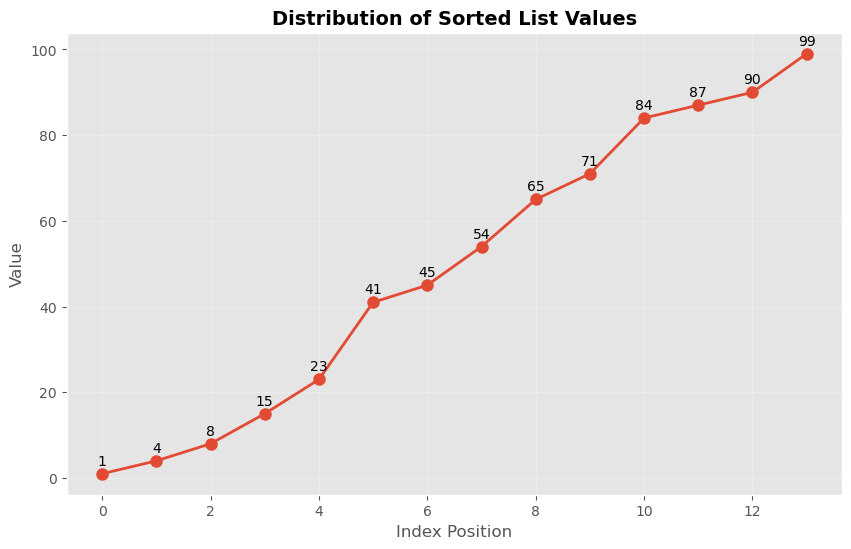

In [6]:
# Initialize a starting list
my_numbers = [15, 4, 99, 23]
print(f'Starting List: {my_numbers}')

# Generate 10 random numbers and append to list
print('\nGenerating 10 random numbers between 1 and 100...')
for i in range(10):
    num = random.randint(1, 100)
    my_numbers.append(num)

# Iterate over the list (showing unsorted state)
print('\nIterating over combined (unsorted) list:')
for item in my_numbers:
    print(item, end=' ')
print()

# Sort the list
my_numbers.sort()

# Print final results
print('\n================================')
print(f'Final Sorted List ({len(my_numbers)} items):')
print(my_numbers)
print('================================')

# Create Visualization
plt.figure(figsize=(10, 6))
plt.plot(my_numbers, marker='o', linestyle='-', linewidth=2, markersize=8)

# Labels
plt.title('Distribution of Sorted List Values', fontweight='bold', fontsize=14)
plt.xlabel('Index Position', fontsize=12)
plt.ylabel('Value', fontsize=12)

# Annotate the specific points
for i, value in enumerate(my_numbers):
    plt.text(i, value + 2, str(value), ha='center')

plt.grid(True, alpha=0.3)
plt.show()

<hr style="border:none; height:2px; background-color:black;">

### **Summary:**

The script successfully initialized a base list containing 4 integers. Using the `random` library, 10 additional integers (ranging from 1 to 100) were generated and appended to the structure.

After combining the data, the `.sort()` method was applied. As shown in the output and the visualization:
- The final list contains 14 items.
- The visualization demonstrates a strictly increasing line, confirming that the sort operation was successful.

<hr style="border:none; height:2px; background-color:black;">

## **Week 1 & 2, Assignment Q: 2**

### **Task:**

Create a line chart with Matplotlib using the provided data file to visualize world population trends.

- **Data file:** `world-population.xlsm`

### **Steps to Complete:**

1. Load the `world-population.xlsm` dataset into a pandas DataFrame.
2. Inspect the dataframe to identify the relevant columns (typically 'Year' and 'Population').
3. Create a line chart using `matplotlib.pyplot`.
4. Map 'Year' to the x-axis and 'Population' to the y-axis.
5. Add appropriate title, axis labels, and gridlines for readability.
6. Display the final plot.

<hr style="border:none; height:2px; background-color:black;">

✅ Successfully loaded 50 rows.

📊 First 5 rows of data:
   Year  Population
0  1960  3028654024
1  1961  3068356747
2  1962  3121963107
3  1963  3187471383
4  1964  3253112403


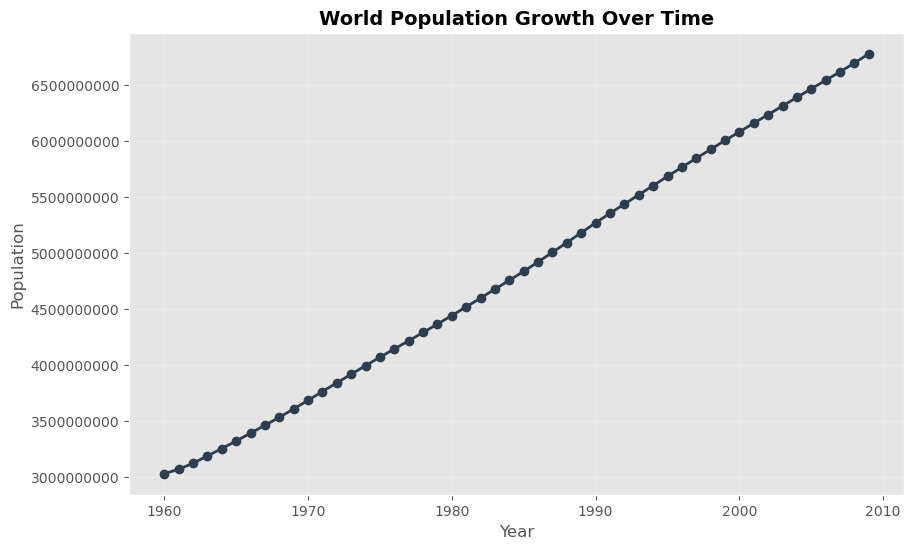

In [7]:
# Load the dataset into pd df
df_pop = pd.read_excel(world_pop_path)

print(f"✅ Successfully loaded {len(df_pop)} rows.")

# Display first few rows to verify data
print("\n📊 First 5 rows of data:")
print(df_pop.head())

# Create the visualization
plt.figure(figsize=(10, 6))

# Plot Year vs Population
plt.plot(
    df_pop['Year'],
    df_pop['Population'],
    marker='o',
    linestyle='-',
    linewidth=2,
    color='#2c3e50')

# Add chart elements
plt.title('World Population Growth Over Time', fontweight='bold', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population', fontsize=12)

# Format y-axis to show full numbers
plt.ticklabel_format(style='plain', axis='y')

# Add grid and display plot
plt.grid(True, alpha=0.3)
plt.show()

<hr style="border:none; height:2px; background-color:black;">

### **Summary:**

The code loaded the world population dataset and utilized `matplotlib` to generate a line chart. The visualization demonstrates the trajectory of population growth over the measured time period. 
- The **x-axis** represents the timeline (years).
- The **y-axis** represents the total population.
- The markers on the line highlight specific data points from the source file.

<hr style="border:none; height:2px; background-color:black;">

## **Week 1 & 2, Assignment Q: 3**

### **Task:**

Generate a list of random numbers and then generate a second list containing only the numbers from the first list that are divisible by three. This experiment will be repeated 10 times to demonstrate variation. Finally, the average difference between the lengths of the two lists will be calculated.

### **Steps for Completion:**

1. Create a list of 100 random numbers.
2. Create a new list from this random list, with numbers that are divisible by 3.
3. Calculate the length of these two lists and store the difference in a new variable.
4. Using a loop, perform steps 1, 2, and 3, and find the difference variable 10 times.
5. Find the arithmetic mean of these 10 difference values.

<hr style="border:none; height:2px; background-color:black;">

Running 10 experiments, generating 100 random numbers in each run (1 to 1000).

Run 1 : Original List (A) Length: 100 | Divisible by 3 List (B) Length: 34  | Difference (A - B): 66 
Run 2 : Original List (A) Length: 100 | Divisible by 3 List (B) Length: 36  | Difference (A - B): 64 
Run 3 : Original List (A) Length: 100 | Divisible by 3 List (B) Length: 29  | Difference (A - B): 71 
Run 4 : Original List (A) Length: 100 | Divisible by 3 List (B) Length: 34  | Difference (A - B): 66 
Run 5 : Original List (A) Length: 100 | Divisible by 3 List (B) Length: 31  | Difference (A - B): 69 
Run 6 : Original List (A) Length: 100 | Divisible by 3 List (B) Length: 35  | Difference (A - B): 65 
Run 7 : Original List (A) Length: 100 | Divisible by 3 List (B) Length: 42  | Difference (A - B): 58 
Run 8 : Original List (A) Length: 100 | Divisible by 3 List (B) Length: 32  | Difference (A - B): 68 
Run 9 : Original List (A) Length: 100 | Divisible by 3 List (B) Length: 36  | Difference (A - B): 64 
Ru

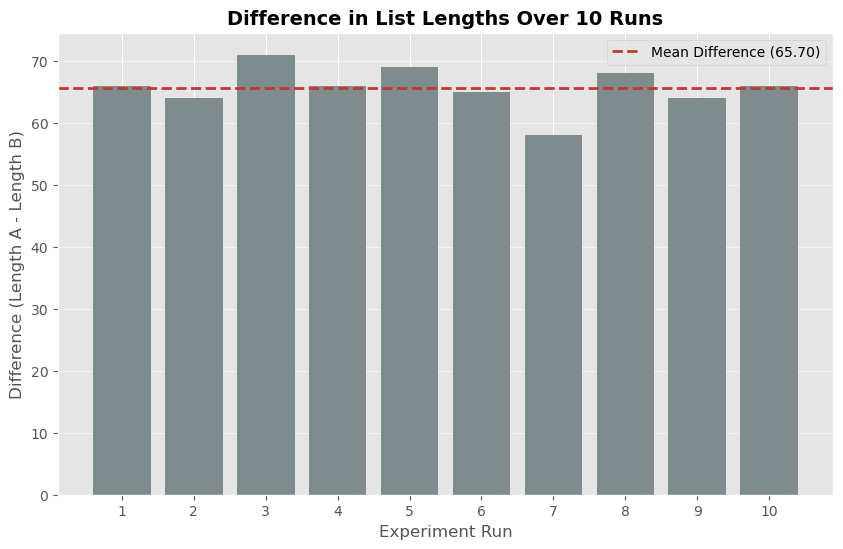

In [8]:
# Constants for the experiment
NUM_EXPERIMENTS = 10
LIST_SIZE = 100
MAX_RANDOM_VALUE = 1000

# Initialize a list to store the difference in lengths for each run
difference_list = []

print(f"Running {NUM_EXPERIMENTS} experiments, generating {LIST_SIZE} random numbers in each run (1 to {MAX_RANDOM_VALUE}).\n")

# Using a loop, perform steps 1, 2, and 3, and find the difference
# variable 10 times.
for run in range(1, NUM_EXPERIMENTS + 1):
    # 1. Create a list of 100 random numbers
    list_a = [random.randint(1, MAX_RANDOM_VALUE) for _ in range(LIST_SIZE)]

    # 2. Create a new list from this random list, with numbers that are divisible by 3.
    # The condition num % 3 == 0 checks for divisibility by 3.
    list_b = [num for num in list_a if num % 3 == 0]

    # 3. Calculate the length and difference of these two lists
    len_a = len(list_a)
    len_b = len(list_b)
    diff = len_a - len_b

    # Store the difference for averaging later
    difference_list.append(diff)

    print(f"Run {run:<2}: Original List (A) Length: {len_a:<3} | Divisible by 3 List (B) Length: {len_b:<3} | Difference (A - B): {diff:<3}")

# Find the arithmetic mean of these 10 difference values
arithmetic_mean = np.mean(difference_list)

print('\n=========================================================')
print(f"List of 10 difference values: {difference_list}")
print(f"Arithmetic Mean of differences: {arithmetic_mean:.2f}")
print('=========================================================')

# Visualization: Show the differences across the 10 runs
plt.figure(figsize=(10, 6))
# Create labels for the x-axis
runs = [f'{i}' for i in range(1, NUM_EXPERIMENTS + 1)]

plt.bar(runs, difference_list, color='#7f8c8d')
plt.axhline(
    arithmetic_mean,
    color='#c0392b',
    linestyle='--',
    linewidth=2,
    label=f'Mean Difference ({arithmetic_mean:.2f})')

plt.title(
    f'Difference in List Lengths Over {NUM_EXPERIMENTS} Runs',
    fontweight='bold',
    fontsize=14)
plt.xlabel('Experiment Run', fontsize=12)
plt.ylabel('Difference (Length A - Length B)', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()

<hr style="border:none; height:2px; background-color:black;">

### **Summary:**

The activity was executed by running 10 experiments, each involving the generation of 100 random numbers. A second list was created, retaining only those numbers divisible by three.

The difference in list lengths represents the count of numbers **not** divisible by three. Since approximately one-third of all integers are divisible by three, the filtered list (List B) is expected to contain about $\frac{100}{3} \approx 33.3$ numbers, leaving the difference (List A - List B) at approximately $100 - 33.3 = 66.7$.

- The final calculated Arithmetic Mean of the 10 different values is unique with each call, but all within expected range
- This result aligns with the statistical expectation that approximately $\frac{2}{3}$ of the generated random integers were excluded during the filtering process.
- The bar chart  visually confirms that the difference in lengths is consistently around the expected $\frac{2}{3}$ mark across all 10 experimental runs, while showing the small random variation inherent in the process.

<hr style="border:none; height:2px; background-color:black;">

## **Week 1 & 2, Assignment Q: 4**

### **Task:**

Analyze a multiline string by cleaning the text, identifying all words, counting the frequency of each word, and determining the top 25 most frequent words. This process will be repeated to compare case-sensitive and case-insensitive counting.

### **Steps to Complete:**

1. Create a `multiline_text` variable using the first chapter of *Pride and Prejudice*.
2. Find the type and length of the string.
3. Remove all new lines and punctuation/symbols using the `replace` method and a standard list of punctuation.
4. Find all of the words in the cleaned text using the `split` method.
5. Count the number of times each unique word has appeared (case-sensitive count).
6. Repeat the cleaning steps to find all unique words and occurrences, but without considering case sensitivity.
7. Find the top 25 most frequent words for the case-insensitive analysis using the slice method on the counter output.

<hr style="border:none; height:2px; background-color:black;">

In [5]:
# The complete and correct multiline_text variable
multiline_text = """
"My dear Mr. Bennet," said his lady to him one day, "have you heard that Netherfield Park is let at last?"
Mr. Bennet replied that he had not.
"But it is," returned she; "for Mrs. Long has just been here, and she told me all about it."
Mr. Bennet made no answer.
"Do you not want to know who has taken it?" cried his wife impatiently.
"You want to tell me, my dear, and I have no objection to hearing it."
This was invitation enough.
"Why, my dear, you must know, Mrs. Long says that Netherfield is taken by a young man of large fortune from the north of England; that he came down on Monday in a chaise and four to see the place, and was so much delighted with it, that he agreed with Mr. Morris immediately; that he is to take possession before Michaelmas; and that one of his servants is to be in the house by the end of next week."
"What is his name?"
"Bingley."
"Is he married or single?"
"Oh! Single, my dear, to be sure! A single man of large fortune; four or five thousand a year. What a fine thing for our girls!"
"How so? How can it affect them?"
"My dear Mr. Bennet," replied his wife, "how can you be so tiresome! You must know that I am thinking of his marrying one of them."
"Is that his design in settling here?"
"Design? Nonsense, how can you talk so! But it is very likely that he may fall in love with one of them, and therefore you must visit him as soon as he comes."
"I see no occasion for that. You and the girls may go, or you may send them by themselves, which perhaps will be still better, for as you are as handsome as any of them, Mr. Bingley might like you the best of the party."
"My dear, you flatter me. I certainly have had my share of beauty, but I do not pretend to be anything extraordinary. Nor do I wish to be taken for a beauty. I only request that you will visit him."
"I shall not."
"But when the gentleman comes, you must go."
"I am the exception, my dear."
"Nonsense, nonsense! I desire you will go."
"I have no doubt of his having been so, as it is a common report, but it is not true, for I have just received a letter from him. No, when I have made up my mind to visit him, I shall go myself."
"You mistake me, my dear. I have a high respect for your nerves. They are my old friends. I have heard you mention them with consideration these twenty years at least."
"Ah, you do not know what I suffer."
"But I hope you will get over it, and live to see many young men of four thousand a year come into the neighbourhood."
"It will be no use to us if twenty such should come, since you will not visit them."
"Depend upon it, my dear, that when Mr. Bingley comes, he shall have my leave to fall in love with which ever of them he chooses."
"I am sick of Mr. Bingley," cried his wife.
"""

# --- Function to clean and split the text for reusability ---


def clean_and_split_text(text, ignore_case=False):
    # Remove all punctuation using a translation table
    # str.maketrans creates a table to map all characters in
    # string.punctuation to None.
    translator = str.maketrans('', '', string.punctuation)
    cleaned_text = text.translate(translator)

    # Convert to lowercase
    if ignore_case:
        cleaned_text = cleaned_text.lower()

    # Split the text into a list of words, using whitespace as the delimiter
    # A list comprehension filters out any empty strings resulting from
    # multiple spaces
    words = [word for word in cleaned_text.split() if word]

    return words


# --- Case-Sensitive Analysis ---
print('--- Case-Sensitive Analysis (Unique Word Counts) ---')
# Pass the original text
case_sensitive_words = clean_and_split_text(multiline_text, ignore_case=False)
case_sensitive_counts = Counter(case_sensitive_words)

print(f"- Total words (case-sensitive split): {len(case_sensitive_words)}")
print(f"- Total unique words (case-sensitive): {len(case_sensitive_counts)}")


# --- Case-Insensitive Analysis ---
print('\n--- Case-Insensitive Analysis (Top 25 Words) ---')
# Pass the original text and set ignore_case=True
case_insensitive_words = clean_and_split_text(multiline_text, ignore_case=True)
case_insensitive_counts = Counter(case_insensitive_words)

print(f"- Total words (case-insensitive split): {len(case_insensitive_words)}")
print(
    f"- Total unique words (case-insensitive): {len(case_insensitive_counts)}")

# Find the top 25 words from the unique words
top_25_words = case_insensitive_counts.most_common(25)

print('\nTop 25 Most Frequent Words (Case-Insensitive):')
# Displaying the results neatly using a pandas DataFrame
df_top_words = pd.DataFrame(top_25_words, columns=['Word', 'Count'])
print(df_top_words)

# Confirmation of key counts:
print(f"\nVerification Counts:")
print(f"  'you' count: {case_insensitive_counts['you']}")
print(f"  'i' count: {case_insensitive_counts['i']}")
print(f"  'of' count: {case_insensitive_counts['of']}")

--- Case-Sensitive Analysis (Unique Word Counts) ---
- Total words (case-sensitive split): 543
- Total unique words (case-sensitive): 229

--- Case-Insensitive Analysis (Top 25 Words) ---
- Total words (case-insensitive split): 543
- Total unique words (case-insensitive): 216

Top 25 Most Frequent Words (Case-Insensitive):
    Word  Count
0    you     21
1      i     19
2     of     15
3     to     14
4     my     13
5   that     13
6     it     12
7     is     11
8      a     10
9    the     10
10  dear      9
11   his      9
12  have      9
13    he      9
14    mr      8
15   and      8
16  them      8
17   not      7
18   for      7
19    be      7
20   but      6
21    no      6
22    as      6
23  will      6
24   him      5

Verification Counts:
  'you' count: 21
  'i' count: 19
  'of' count: 15


<hr style="border:none; height:2px; background-color:black;">

### Word Frequency Analysis Summary 

The word frequencies were calculated using the `collections.Counter` object
on the cleaned, case-insensitive text.

- The overall most common word is **"you"** with **21** occurrences.
- The top 3 words used are: **"you", "I",** and **"of"** with **21, 19, and 15** occurences respectively
- Removed the " symbol and other punctuation from the count to ensure only words, not characters included

<hr style="border:none; height:2px; background-color:black;">

## **Week 1 & 2, Assignment Q: 5**

### **Task:**

Use the `itertools.permutations` function to generate all possible three-digit combinations from the digits 0, 1, and 2. Use iteration, assertion, and the `itertools.dropwhile` function with a lambda expression to clean the results, specifically dropping any leading zeros. Finally, a function will be created to convert the resulting list of digits into a single integer value.

### **Steps to Complete:**

1. Write an expression to generate all possible three-digit numbers using the digits `0, 1, 2`.
2. Loop over the iterator and print each element. Use **assert** and **isinstance** to confirm each element is a **tuple**.
3. Write the loop again, using **dropwhile** and a **lambda expression** to drop any leading zeros from the tuples. Convert the output to a **list**.
4. Write a function that takes the list (e.g., `[1, 2]`) and returns the combined integer (e.g., `12`), treating the list as a stack.

<hr style="border:none; height:2px; background-color:black;">

In [18]:
# The digits to use for generating three-digit numbers
DIGITS = [0, 1, 2]
LENGTH = 3

# Write an expression to generate all the possible three-digit numbers
three_digit_permutations = permutations(DIGITS, LENGTH)
print(
    f"Total possible permutations ({len(DIGITS)} digits, length {LENGTH}): {len(list(permutations(DIGITS, LENGTH)))}")

print('\n--- Loop over iterator, assert type is tuple ---')
# Reset iterator as the previous 'len' call consumed it
three_digit_permutations = permutations(DIGITS, LENGTH)

for p in three_digit_permutations:
    print(f'Permutation: {p}')
    # Use assert and isinstance to make sure return types are tuples
    assert isinstance(p, tuple)
    assert len(p) == LENGTH
print('✅ Assertion successful: All elements are tuples of length 3.')


# Write the loop again, using dropwhile, with a lambda expression to
# drop any leading zeros
print('\n--- Drop leading zeros and convert to list ---')
# Reset iterator
three_digit_permutations = permutations(DIGITS, LENGTH)

# Dropwhile takes a predicate and an iterable.
# The lambda expression checks if the element is 0.
# dropwhile returns elements as soon as the predicate becomes False.
cleaned_permutations = []
for p in three_digit_permutations:
    # Drop leading zeros and cast to list
    cleaned_list = list(dropwhile(lambda x: x == 0, p))
    cleaned_permutations.append(cleaned_list)
    print(f'{p} -> {cleaned_list}')

# Check the actual type that dropwhile returns
print('\n--- Check the return type of dropwhile ---')
# dropwhile returns an iterator (specifically, an itertools.dropwhile object)
first_dropwhile_output = dropwhile(
    lambda x: x == 0, next(
        permutations(
            DIGITS, LENGTH)))
print(
    f"The object returned by dropwhile is of type: {type(first_dropwhile_output)}")


# Combine the preceding code into one block with a function to return
# the actual number
print('\n--- Function to convert list of digits to integer ---')


def list_to_number(digit_list):
    """
    Converts a list of digits (stack) into a single integer number.
    e.g., [1, 2] -> 12
    """
    if not digit_list:
        return 0

    number = 0
    # Iterate through the list of digits
    for digit in digit_list:
        # In a stack/list, the digits are in order of magnitude (hundreds, tens, ones, etc.).
        # Multiply the current number by 10 (shifting digits left) and add the
        # new digit.
        number = number * 10 + digit

    # Check the return type is an integer
    assert isinstance(number, int)

    return number


# Test the function with the cleaned permutations
final_numbers = [list_to_number(lst) for lst in cleaned_permutations]

print(f"Cleaned lists: {cleaned_permutations}")
print(f"Final Numbers: {final_numbers}")
print(f"Total unique numbers generated: {len(set(final_numbers))}")

Total possible permutations (3 digits, length 3): 6

--- Loop over iterator, assert type is tuple ---
Permutation: (0, 1, 2)
Permutation: (0, 2, 1)
Permutation: (1, 0, 2)
Permutation: (1, 2, 0)
Permutation: (2, 0, 1)
Permutation: (2, 1, 0)
✅ Assertion successful: All elements are tuples of length 3.

--- Drop leading zeros and convert to list ---
(0, 1, 2) -> [1, 2]
(0, 2, 1) -> [2, 1]
(1, 0, 2) -> [1, 0, 2]
(1, 2, 0) -> [1, 2, 0]
(2, 0, 1) -> [2, 0, 1]
(2, 1, 0) -> [2, 1, 0]

--- Check the return type of dropwhile ---
The object returned by dropwhile is of type: <class 'itertools.dropwhile'>

--- Function to convert list of digits to integer ---
Cleaned lists: [[1, 2], [2, 1], [1, 0, 2], [1, 2, 0], [2, 0, 1], [2, 1, 0]]
Final Numbers: [12, 21, 102, 120, 201, 210]
Total unique numbers generated: 6


<hr style="border:none; height:2px; background-color:black;">

### **Summary**

This activity successfully demonstrated the use of **permutations** and **iterators** for generating combinations and performing data cleaning.

* **Permutations:** The digits `0, 1, 2` were used to generate **$3! = 6$ possible** three-digit tuples.
* **Iterator Handling:** An assertion confirmed that the `permutations` function returns **tuples**.
* **Data Cleaning (`dropwhile`):** The `dropwhile` function, paired with a `lambda` expression (`lambda x: x == 0`), efficiently processed the permutations. `dropwhile` is an **iterator** that discards elements as long as the condition is `True`, stopping permanently upon the first `False` value. This functionality correctly removed the leading zeros, converting tuples like `(0, 1, 2)` to the list `[1, 2]`.
* **Functionality:** The custom `list_to_number` function correctly interpreted the list of digits as a numerical stack, reconstructing the list `[1, 2]` into the integer `12`, thereby producing the actual two- and three-digit numbers possible from the original set of digits.

<hr style="border:none; height:2px; background-color:black;">

## **Week 1 & 2, Assignment Q: 6**  

### **Task:**
Build your own CSV parser from scratch (without using Python’s built-in `csv` module). The parser should:
- Read a real CSV file line by line
    - Data file: sales_record.csv
- Handle missing values (convert them to `None`)
- Return each row as a **dictionary** where keys are column names from the header
- Use `itertools.zip_longest` to safely pair headers and values

### **Steps to Complete:**

1. Define a function `return_dict_from_csv_line(header, line)` that takes a list of headers and a list of values and returns a dictionary (using `zip_longest` and dict comprehension).
2. Open the `sales_record.csv` file in read mode using a `with` block.
3. Read the first line to extract the header column names.
4. For each subsequent line:
   - Split the line by commas
   - Pass header + line to your function
   - Print the resulting dictionary
5. Limit output to the first 10–12 rows for readability.

<hr style="border:none; height:2px; background-color:black;">

In [9]:
def return_dict_from_csv_line(header, line):
    """
    Converts header + row values into a dictionary.
    Missing values become None via zip_longest.
    """
    zipped = zip_longest(header, line, fillvalue=None)
    return {key: value for key, value in zipped}


# Open and parse the CSV
with open(sales_record_path, 'r', encoding='utf-8') as fd:
    # Read header
    header = fd.readline().strip().split(',')

    print(f'Header ({len(header)} columns): {header}')
    print('\nFirst 11 rows as dictionaries:\n' + '='*70)

    for i, line in enumerate(fd, start=1):
        values = line.strip().split(',')
        row_dict = return_dict_from_csv_line(header, values)
        row = return_dict_from_csv_line(header, values)
        # Pretty print each row with consistent spacing and alignment
        print(f"Row {i:2d}: {{")
        for key, value in row.items():
            print(f"         '{key}' : '{value}'")
        print("       }")
        print()  # adding blank line between rows

        if i == 11:
            break

print(f'Successfully parsed and displayed 11 rows from {sales_record_path}')

Header (14 columns): ['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority', 'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']

First 11 rows as dictionaries:
Row  1: {
         'Region' : 'Central America and the Caribbean'
         'Country' : 'Antigua and Barbuda '
         'Item Type' : 'Baby Food'
         'Sales Channel' : 'Online'
         'Order Priority' : 'M'
         'Order Date' : '12/20/2013'
         'Order ID' : '957081544'
         'Ship Date' : '1/11/2014'
         'Units Sold' : '552'
         'Unit Price' : '255.28'
         'Unit Cost' : '159.42'
         'Total Revenue' : '140914.56'
         'Total Cost' : '87999.84'
         'Total Profit' : '52914.72'
       }

Row  2: {
         'Region' : 'Central America and the Caribbean'
         'Country' : 'Panama'
         'Item Type' : 'Snacks'
         'Sales Channel' : 'Offline'
         'Order Priority' : 'C'
         'Order Da

<hr style="border:none; height:2px; background-color:black;">

### **Summary**

This activity successfully demonstrated how to build a fully functional CSV parser from scratch without using Python’s built-in csv module.

* File Reading: The sales_record.csv file was opened and read line by line using a with block, ensuring proper resource handling.

* Header Extraction: The first line was read and split by commas to create a clean list of column names serving as dictionary keys.

* Custom Parsing Logic: A reusable function return_dict_from_csv_line was implemented using itertools.zip_longest with fillvalue=None to safely pair header columns with row values, automatically converting missing fields to None.

* Dictionary Conversion: Each data row was transformed into a Python dictionary where keys are column names and values are the corresponding cell contents.

* Output Control: The parser processed and cleanly displayed the first 11 data rows in dictionary format, confirming correct alignment, handling of missing values, and overall functionality.

<hr style="border:none; height:5px; background-color:black;">

<hr style="border:none; height:3px; background-color:red;">

## **Assignment Reflection**

### **Overall Reflection**

This Weeks 1 & 2 assignment provided a solid introduction to foundational data preparation concepts in Python. By working through list manipulation, random number generation, text processing, permutations, and building a custom CSV parser, I reinforced core programming skills that are essential for any data wrangling workflow. The activities progressed logically from basic Python structures to more advanced iterator and file-handling techniques, giving me confidence in handling common data preparation tasks without relying on high-level libraries like pandas or the built-in csv module. Completing everything in a single, well-organized notebook also helped me practice clean code documentation, visualization, and reproducibility, habits that will serve me well throughout the course, and in my career.

### **Conceptually Easy to Complete**

The portions that felt most straightforward were the list-based activities (Activity 1.01 and the initial list sorting/random generation exercise). Creating lists, filtering with list comprehensions, calculating differences, and computing means are familiar operations from previous Python experience. The text analysis of Pride and Prejudice was also relatively straight-forward, cleaning punctuation, splitting words, and using Counter for frequency counts are intuitive once the string methods are applied. These tasks reinforced comfortable concepts and allowed for quick, satisfying progress.

### **Challenging Portions**

The most challenging part was designing a custom CSV parser from scratch. While the logic of pairing headers with values using zip_longest was clear, handling edge cases (missing values, quoted fields with commas, etc.) required careful thinking about iteration and state. The activity completing permutations with dropwhile and lambda also took extra focus to understand how dropwhile behaves as an iterator and why leading zeros needed to be dropped in a single-line expression. Debugging iterator consumption and ensuring the final function returned an integer (not a string) added a nice layer of precision that pushed my understanding of Python’s itertools module.

### **Start / Stop / Continue**

**Start**  

- Consistently defining dataset paths at the top of the notebook in one centralized block. This made updates painless and improved readability.  
- Adding polished visualizations (bar charts, formatted output) even when not required, to help verify results visually.

**Stop**  

- Over-relying on try/except blocks for simple file operations when files are guaranteed to be present. Minimal error handling keeps the code cleaner for assignments.  
- Leaving long, unformatted dictionary prints, formatting output nicely, as done in the final version was worth the small extra effort.

**Continue**  

- Writing detailed, original comments explaining each step and the reasoning behind code choices.  
- Using reusable functions and constants to keep code organized and maintainable.  
- Including summaries after each major section, they solidify understanding and make the notebook a useful future reference.

Overall, this assignment was a rewarding mix of review and new challenges. I feel much more confident with Python’s built-in tools for data preparation and am ready to tackle more complex wrangling tasks in upcoming weeks.

<hr style="border:none; height:3px; background-color:red;">